# Missing Data

In [1]:
# Import libraries
import random
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
# Make a dataset of size N
N = 100
MU = 0
SIGMA = 2

# Regression coefficients
# Y = response
beta0 = 8
beta1 = .17

def makeDF(N = 100):
    dfList = []
    for i in range(N):
        # make a single observation
        income = np.random.normal(48, 20)
        education = int(beta0 + beta1 * income + np.random.normal(MU, SIGMA))
        r = 0
        dfList.append({'education': education, 'income': income,'R': r})
    df = pd.DataFrame(dfList)
    return df

def runRegression(df):   
    X_train = df['education'].values.reshape(-1, 1)
    Y_train = df['income'].values.reshape(-1, 1)
    # run the model
    linear_regressor = LinearRegression()
    mod = linear_regressor.fit(X_train, Y_train)
    return(mod, X_train, Y_train)

def scatPlot(df, title, leg = False, missing = True):
    #colors = ["#FFBC3DFF", "#0088CEFF", "#D52B1EFF", "#8AA28AFF"] # yellow, blue, red, green
    if not missing:
        colors = ["#0088CEFF"]
    else:
        colors = ["#0088CEFF","#D52B1EFF"]
    sns.color_palette = colors
    if leg:
        sns.scatterplot(x = 'education', y = 'income', palette = colors, hue = 'R', s =100, alpha = .7, legend = 'brief', data = df)
        plt.xlim(9, 27)
        plt.legend(loc='center right')
    else:
        sns.scatterplot(x = 'education', y = 'income', palette = colors, hue = 'R', s = 100, alpha = .7, legend = False, data = df)
        plt.xlim(9, 22)
    plt.title(title, fontsize = 22)
    plt.xlabel('education (in years)', fontsize=18)
    plt.ylabel('income (in $1000s)', fontsize=18)
    plt.ylim(0, 100)

(0, 100)

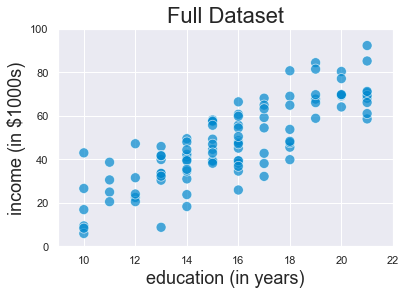

In [3]:
N = 100
#df = makeDF(N)
# save df
#pd.DataFrame.to_csv(df, "DF")
df = pd.read_csv("DF")

colors = ["#0088CEFF"]
sns.color_palette = colors
sns.scatterplot(y = 'income', x = 'education', hue = 'R', palette = colors, s = 100, legend = False, data = df, alpha = .7)
plt.title("Full Dataset", fontsize = 22)
plt.xlabel('education (in years)', fontsize=18)
plt.ylabel('income (in $1000s)', fontsize=18)
plt.xlim(9, 22)
plt.ylim(0, 100)

## Missing Analysis

In [4]:
def MCAR(dataFrame = df, propMissing = .25, colMissing = 'income', reshape = False, delete = True):
    '''
    Makes data frame MCAR
    '''
    MCARdf = dataFrame.copy() # make a coy of the dataFrame
    N = len(df) # length of data frame
    numMissing = int(N*propMissing) # number rows MCAR
    # find the indicies to delete
    indiciesToDel = np.random.choice(N, numMissing, replace=False)  
    # replace random rows' column with None
    if delete:
        MCARdf.loc[indiciesToDel,colMissing] = None
    MCARdf.loc[indiciesToDel,'R'] = 1
    # if reshape == True, delete NAs
    if reshape: 
        # drop to the NAs
        MCARdf.dropna(inplace=True)
    return MCARdf

def MAR(dataFrame = df, propMissing = .25, colMissing = 'income', reshape = False, delete = True):
    '''
    Makes data frame MAR
    '''
    MARdf = dataFrame.copy() # make a coy of the dataFrame
    N = len(df) # length of data frame
    numMissing = int(N*propMissing) # number rows MAR
    # drop top largest x2
    MARindex = MARdf.nlargest(numMissing, 'education').index
    if delete:
        MARdf.loc[MARindex,colMissing] = None
    MARdf.loc[MARindex,'R'] = 1
    if reshape: 
        # drop to the NAs
        MARdf.dropna(inplace=True)
    return MARdf

def MNAR(dataFrame = df, propMissing = .25, colMissing = 'income', reshape = False, delete = True):
    '''
    Makes data frame MNAR
    '''
    MNARdf = dataFrame.copy() # make a coy of the dataFrame
    N = len(df) # length of data frame
    numMissing = int(N*propMissing) # number rows MAR
    # make a coy of the dataFrame
    MNARdf = dataFrame.copy()
    # Drop 25% of dataset (rows with the largest income)
    MNARindex = MNARdf.nlargest(numMissing, 'income').index
    if delete:
        MNARdf.loc[MNARindex,colMissing] = None
    MNARdf.loc[MNARindex,'R'] = 1
    if reshape: 
        # drop to the NAs
        MNARdf.dropna(inplace=True)
    return MNARdf

## Simulation
### Listwise Deletion

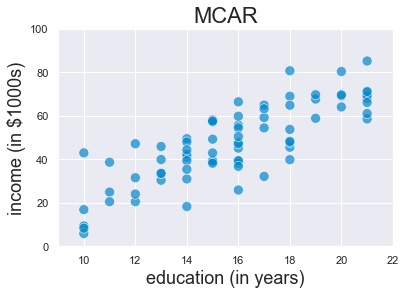

In [5]:
df = pd.read_csv("DF")
MCARdf = MCAR(df, reshape = True)
scatPlot(MCARdf, "MCAR", leg = False, missing = False)

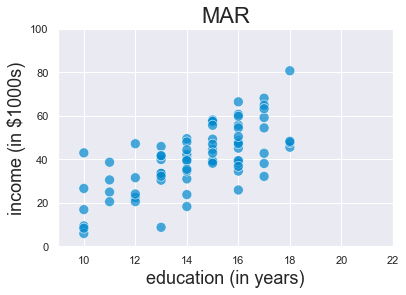

In [6]:
df = pd.read_csv("DF")
MARdf = MAR(df, reshape = True)
scatPlot(MARdf, "MAR", leg = False, missing = False)

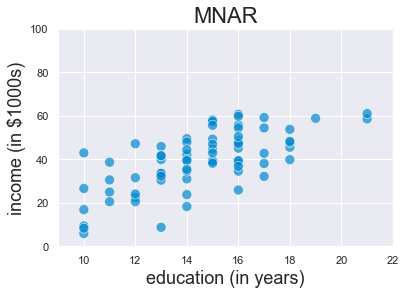

In [7]:
MNARdf = MNAR(df, reshape = True)
scatPlot(MNARdf, "MNAR", leg = False, missing = False)

In [10]:
NUM_SIMULATIONS = 1000
N = 40 # size of dataset

# store Xbar
FULL_xbar = []
MCAR_xbar = []
MAR_xbar = []
MNAR_xbar = []


for i in range(NUM_SIMULATIONS):
    
    # make dataframe
    df = makeDF(N)
    
    # FULL DATASET
    # Run Regression on FULL
    FULL_xbar.append(np.mean(df['income']))
    
    # MCAR DATASET
    MCARdf = MCAR(df)
    # Run Regression on MCAR
    MCAR_xbar.append(np.mean(MCARdf['income']))
    
    # MAR DATASET
    MARdf = MAR(df, reshape = False)    
    # Run Regression on MAR
    MAR_xbar.append(np.mean(MARdf['income']))
    
    
    # MNAR DATASET
    MNARdf = MNAR(df)
    # Run Regression on MNAR
    MNAR_xbar.append(np.mean(MNARdf['income']))

FULL: 48.0652, 10.0701
MCAR: 48.1077, 14.0581
MAR: 40.9309, 11.8700
MNAR: 39.7765, 11.0732


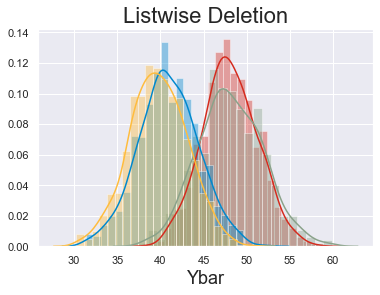

In [11]:
sns.distplot(FULL_xbar, color = '#D52B1EFF', label = 'full')
sns.distplot(MCAR_xbar, color = '#8AA28AFF', label = 'mcar')
sns.distplot(MAR_xbar, color = '#0088CEFF', label = 'mar')
sns.distplot(MNAR_xbar, color = '#FFBC3DFF', label = 'mnar')
#plt.legend(loc='center right')
plt.title("Listwise Deletion", fontsize = 22)
plt.xlabel('Ybar', fontsize=18)

#colors = ["#FFBC3DFF", "#0088CEFF", "#D52B1EFF", "#8AA28AFF"] # yellow, blue, red, green
print("FULL: %.4f, %.4f" %(np.mean(FULL_xbar), np.var(FULL_xbar)))
print("MCAR: %.4f, %.4f" %(np.mean(MCAR_xbar), np.var(MCAR_xbar)))
print("MAR: %.4f, %.4f" %(np.mean(MAR_xbar), np.var(MAR_xbar)))
print("MNAR: %.4f, %.4f" %(np.mean(MNAR_xbar), np.var(MNAR_xbar)))

## IMPUTATION - Mean

In [12]:
def meanImputation(df, demo = False):
    imputeddf = df.copy()
    incomeMean = np.mean(imputeddf[imputeddf['income'].notnull()]['income'])
    indiciesToDel = imputeddf['income'].index[imputeddf['income'].apply(np.isnan)]
    if demo:
        for index in indiciesToDel:
            imputeddf.loc[index,'income'] = incomeMean + np.random.normal(0, 1)
        imputeddf.sort_values('R', inplace = True, ascending = True)
    else:
        imputeddf.loc[indiciesToDel,'income'] = incomeMean
    return imputeddf

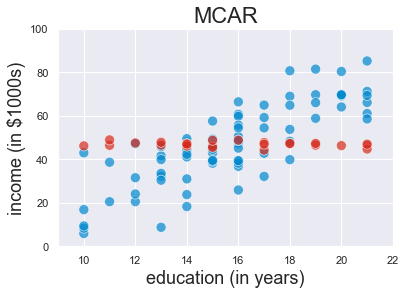

In [13]:
df = pd.read_csv("DF")
MCARdf = MCAR(df, reshape = False)
MCARdf = meanImputation(MCARdf, demo = True)
scatPlot(MCARdf, "MCAR", leg = False)

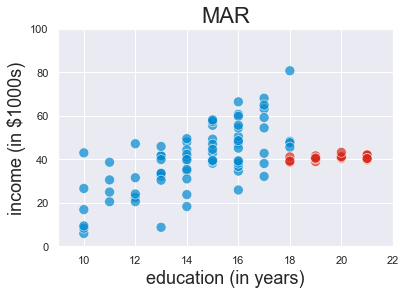

In [14]:
MARdf = MAR(df, reshape = False)
MARdf = meanImputation(MARdf, demo = True)
scatPlot(MARdf, "MAR", leg = False)

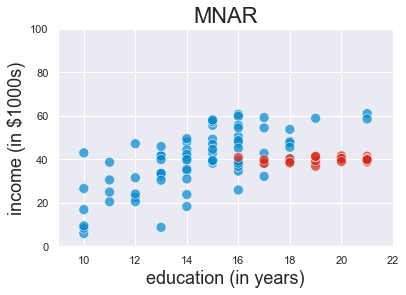

In [15]:
df = pd.read_csv("DF")
MNARdf = MNAR(df, reshape = False)
MNARdf = meanImputation(MNARdf, demo = True)
scatPlot(MNARdf, "MNAR", leg = False)

In [23]:
NUM_SIMULATIONS = 1000
N = 40 # size of dataset

# store estimated coeffs
FULL_xbar = []
MCAR_xbar = []
MAR_xbar = []
MNAR_xbar = []


for i in range(NUM_SIMULATIONS):
    
    # make dataframe
    df = makeDF(N)
    
    # FULL DATASET
    # Run Regression on FULL
    FULL_xbar.append(np.mean(df['income']))
    
    # MCAR DATASET
    MCARdf = MCAR(df, reshape = False)
    # MCAR IMPUTATION
    imputedMCARdf = meanImputation(MCARdf)
    # Run Regression on IMPUTED MCAR
    MCAR_xbar.append(np.mean(MCARdf['income']))

    # MAR DATASET
    MARdf = MAR(df, reshape = False)
    # MAR IMPUTATION
    imputedMARdf = meanImputation(MARdf)
    # Run Regression on IMPUTED MAR
    MAR_xbar.append(np.mean(MARdf['income']))
    
    
    # MNAR DATASET
    MNARdf = MNAR(df, reshape = False)
    imputedMNARdf = meanImputation(MNARdf)
    # Run Regression on MNAR
    MNAR_xbar.append(np.mean(MNARdf['income']))

FULL: 48.0686, 10.5137
MCAR: 48.0820, 13.9130
MAR: 40.9449, 11.8362
MNAR: 39.7614, 11.3610


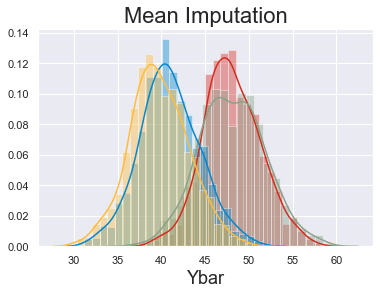

In [21]:
sns.distplot(FULL_xbar, color = '#D52B1EFF', label = 'full')
sns.distplot(MCAR_xbar, color = '#8AA28AFF', label = 'mcar')
sns.distplot(MAR_xbar, color = '#0088CEFF', label = 'mar')
sns.distplot(MNAR_xbar, color = '#FFBC3DFF', label = 'mnar')
#plt.legend(loc='center right')
plt.title("Mean Imputation", fontsize = 22)
plt.xlabel('Ybar', fontsize=18)

#colors = ["#FFBC3DFF", "#0088CEFF", "#D52B1EFF", "#8AA28AFF"] # yellow, blue, red, green
print("FULL: %.4f, %.4f" %(np.mean(FULL_xbar), np.var(FULL_xbar)))
print("MCAR: %.4f, %.4f" %(np.mean(MCAR_xbar), np.var(MCAR_xbar)))
print("MAR: %.4f, %.4f" %(np.mean(MAR_xbar), np.var(MAR_xbar)))
print("MNAR: %.4f, %.4f" %(np.mean(MNAR_xbar), np.var(MNAR_xbar)))

### IMPUTATION - REGRESSION

In [29]:
def regressionImputation(df, error = False, demo = False):
    # make training set
    X_train = df[df['income'].notnull()][['R', 'education']]
    Y_train = df[df['income'].notnull()]['income'].values.reshape(-1,1)
    Y_train = pd.DataFrame(Y_train, columns = ['income'])
 
    # make test set
    X_test = df[df['income'].isnull()][['R', 'education']]

    # run the model
    linear_regressor = LinearRegression()
    mod = linear_regressor.fit(X_train, Y_train)
    Y_pred = mod.predict(X_train)
    MSE = metrics.mean_squared_error(Y_train, Y_pred)

    # imputed values
    Y_test = mod.predict(X_test)
    if error:
        for i in range(len(Y_test)):
            Y_test[i][0] += np.random.normal(0, math.sqrt(MSE))
    if demo:
        for i in range(len(Y_test)):
            Y_test[i][0] += np.random.normal(0, 1)
    Y_test = pd.DataFrame(Y_test, columns = ['income'])

    # put back together the data frames
    traindf = pd.concat([X_train.reset_index(drop=True), Y_train.reset_index(drop=True)], axis = 1)
    testdf = pd.concat([X_test.reset_index(drop=True), Y_test.reset_index(drop=True)], axis = 1)
    imputeddf = traindf.append(testdf)
    return imputeddf

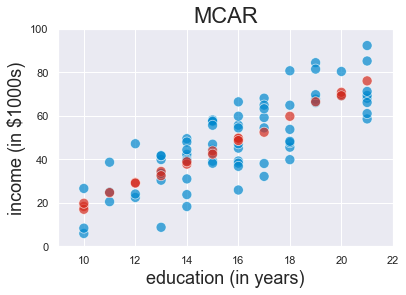

In [63]:
df = pd.read_csv("DF")
MCARdf = MCAR(df, reshape = False)
MCARdf = regressionImputation(MCARdf, demo=True)
scatPlot(MCARdf, "MCAR", leg = False)

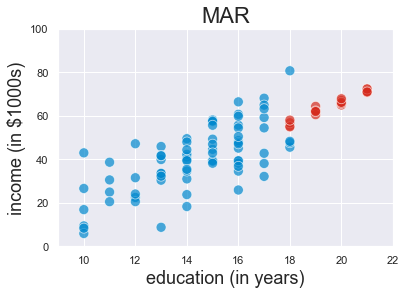

In [64]:
df = pd.read_csv("DF")
MARdf = MAR(df, reshape = False)
MARdf = regressionImputation(MARdf, demo = True)
scatPlot(MARdf, "MAR", leg = False)

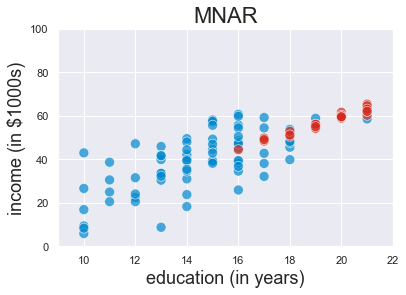

In [65]:
df = pd.read_csv("DF")
MNARdf = MNAR(df, reshape = False)
MNARdf = regressionImputation(MNARdf, demo = True)
scatPlot(MNARdf, "MNAR", leg = False)

In [58]:
NUM_SIMULATIONS = 1000
N = 40 # size of dataset

# store estimated coeffs
FULL_xbar = []
MCAR_xbar = []
MAR_xbar = []
MNAR_xbar = []


for i in range(NUM_SIMULATIONS):
    
    # make dataframe
    df = makeDF(N)
    
    # FULL DATASET
    # Run Regression on FULL
    FULL_xbar.append(np.mean(df['income']))
    
    # MCAR DATASET
    MCARdf = MCAR(df, reshape = False)
    # MCAR IMPUTATION
    imputedMCARdf = regressionImputation(MCARdf, error = True)
    # Run Regression on IMPUTED MCAR
    MCAR_xbar.append(np.mean(MCARdf['income']))

    # MAR DATASET
    MARdf = MAR(df, reshape = False)
    # MAR IMPUTATION
    imputedMARdf = regressionImputation(MARdf, error = True)
    # Run Regression on IMPUTED MAR
    MAR_xbar.append(np.mean(MARdf['income']))
    
    
    # MNAR DATASET
    MNARdf = MNAR(df, reshape = False)
    # MNAR (SINGLE) IMPUTATION
    imputedMNARdf = regressionImputation(MNARdf, error = True)
    # Run Regression on MNAR
    MNAR_xbar.append(np.mean(MNARdf['income']))

FULL: 48.0936, 9.7112
MCAR: 48.1371, 12.7924
MAR: 40.9816, 11.4900
MNAR: 39.7964, 10.9749


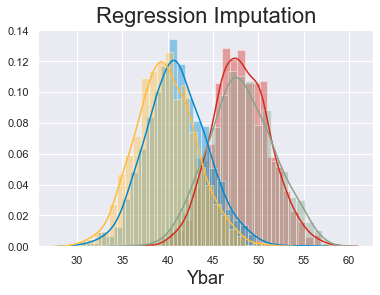

In [59]:
sns.distplot(FULL_xbar, color = '#D52B1EFF', label = 'full')
sns.distplot(MCAR_xbar, color = '#8AA28AFF', label = 'mcar')
sns.distplot(MAR_xbar, color = '#0088CEFF', label = 'mar')
sns.distplot(MNAR_xbar, color = '#FFBC3DFF', label = 'mnar')
#plt.legend(loc='center right')
plt.title("Regression Imputation", fontsize = 22)
plt.xlabel('Ybar', fontsize=18)

#colors = ["#FFBC3DFF", "#0088CEFF", "#D52B1EFF", "#8AA28AFF"] # yellow, blue, red, green
print("FULL: %.4f, %.4f" %(np.mean(FULL_xbar), np.var(FULL_xbar)))
print("MCAR: %.4f, %.4f" %(np.mean(MCAR_xbar), np.var(MCAR_xbar)))
print("MAR: %.4f, %.4f" %(np.mean(MAR_xbar), np.var(MAR_xbar)))
print("MNAR: %.4f, %.4f" %(np.mean(MNAR_xbar), np.var(MNAR_xbar)))

### Multiple Imputation

In [37]:
def multipleImputation(df, N = 5):
    xBar = []
    for i in range(N):
        dfCOPY = df.copy()
        imputeddf = regressionImputation(dfCOPY, error = True)
        xBar.append(np.mean(imputeddf['income']))
    return np.mean(xBar)

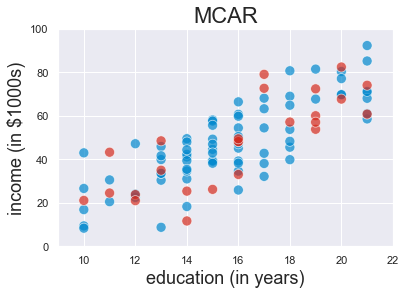

In [60]:
df = pd.read_csv("DF")
MCARdf = MCAR(df, reshape = False)
MCARdf = regressionImputation(MCARdf, error = True)
scatPlot(MCARdf, "MCAR", leg = False)

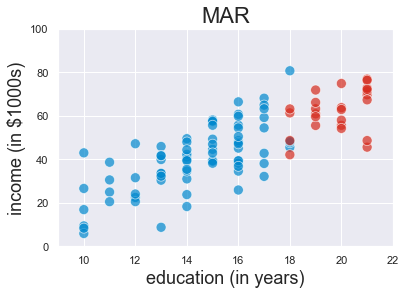

In [61]:
df = pd.read_csv("DF")
MARdf = MAR(df, reshape = False)
MARdf = regressionImputation(MARdf, error = True)
scatPlot(MARdf, "MAR", leg = False)

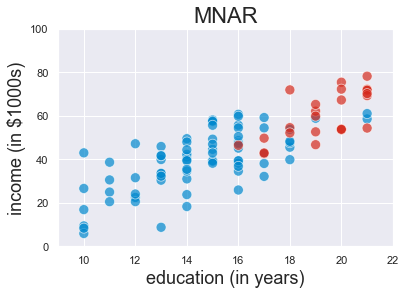

In [62]:
df = pd.read_csv("DF")
MNARdf = MNAR(df, reshape = False)
MNARdf = regressionImputation(MNARdf, error = True)
scatPlot(MNARdf, "MNAR", leg = False)

In [38]:
NUM_SIMULATIONS = 1000
N = 40 # size of dataset

# store estimated coeffs
FULL_xbar = []
MCAR_xbar = []
MAR_xbar = []
MNAR_xbar = []


for i in range(NUM_SIMULATIONS):
    
    # make dataframe
    df = makeDF(N)
    
    # FULL DATASET
    # Run Regression on FULL
    FULL_xbar = FULL_xbar + [np.mean(df['income'])] 
    
    # MCAR DATASET
    MCARdf = MCAR(df, reshape = False)
    # MCAR (MULTIPLE) IMPUTATION
    xBar = multipleImputation(MCARdf)
    MCAR_xbar.append(xBar)

    # MAR DATASET
    MARdf = MAR(df, reshape = False)
    # MAR MULTIPLE IMPUTATION
    xBar = multipleImputation(MARdf)
    MAR_xbar.append(xBar)
    
    
    # MNAR DATASET
    MNARdf = MNAR(df, reshape = False)
    # MNAR MULTIPLE IMPUTATION
    xBar = multipleImputation(MNARdf)
    MNAR_xbar.append(xBar)

FULL: 47.9833, 10.5710
MCAR: 47.9981, 11.5908
MAR: 47.9837, 12.8694
MNAR: 44.6797, 12.3900


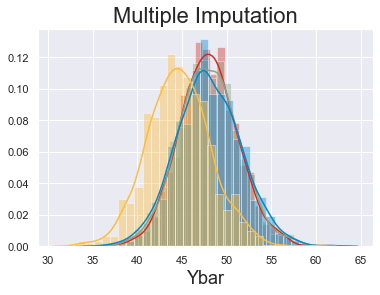

In [39]:
sns.distplot(FULL_xbar, color = '#D52B1EFF', label = 'full')
sns.distplot(MCAR_xbar, color = '#8AA28AFF', label = 'mcar')
sns.distplot(MAR_xbar, color = '#0088CEFF', label = 'mar')
sns.distplot(MNAR_xbar, color = '#FFBC3DFF', label = 'mnar')
#plt.legend(loc='center right')
plt.title("Multiple Imputation", fontsize = 22)
plt.xlabel('Ybar', fontsize=18)

#colors = ["#FFBC3DFF", "#0088CEFF", "#D52B1EFF", "#8AA28AFF"] # yellow, blue, red, green
print("FULL: %.4f, %.4f" %(np.mean(FULL_xbar), np.var(FULL_xbar)))
print("MCAR: %.4f, %.4f" %(np.mean(MCAR_xbar), np.var(MCAR_xbar)))
print("MAR: %.4f, %.4f" %(np.mean(MAR_xbar), np.var(MAR_xbar)))
print("MNAR: %.4f, %.4f" %(np.mean(MNAR_xbar), np.var(MNAR_xbar)))

## EM Algorithm

In [40]:
def B1(MU, SIGMA):
    return SIGMA.item(0,1) / SIGMA.item(1,1)

def B0(MU, SIGMA):
    return MU.item(0) - B1(MU, SIGMA) * MU.item(1)

def VARX1GIVY(MU, SIGMA):
    return SIGMA.item(0,0) - B1(MU, SIGMA)**2 * SIGMA.item(1,1)

def Yhat(X, MU, SIGMA):
    return B0(MU,SIGMA) + B1(MU,SIGMA) * X


def VAR(df):
    N = len(df)
    return (1/N) *  (sum(df['incomeSQ']) - sum(df['income'])**2/N)

def COV(df):
    N = len(df)
    return (1/N) * (sum(df['incomeEducation']) - (sum(df['education'])*sum(df['income']))/N)

In [41]:
def EM(df):
    
    MU = np.matrix([[np.mean(df['income'])], [np.mean(df['education'])]])
    SIGMA = np.matrix([[np.var(df['income'], ddof=1),0], [0,np.var(df['education'], ddof=1)]])
    
    df['educationSQ'] = df['education'] **2
    df.loc[df['R'] == 1, 'income'] = Yhat(df.loc[df['R'] == 1, 'education'], MU, SIGMA)
    varygivx = VARX1GIVY(MU, SIGMA)
    df['incomeSQ'] = df['income'] ** 2 + df['R'] * varygivx
    df['incomeEducation'] = df['income'] * df['education']
    
    converged = False
    
    while not converged:
        count = 0
        
        MUOLD = MU
        SIGMAOLD = SIGMA
        
        # M STEP
        MU = np.matrix([[np.mean(df['income'])], [np.mean(df['education'])]])
        SIGMA = np.matrix([[VAR(df),COV(df)], [COV(df), np.var(df['education'], ddof=0)]])
        
        # E STEP
        b0 = B0(MU, SIGMA)
        b1 = B1(MU, SIGMA)
        varx1givy = VARX1GIVY(MU, SIGMA)
        
        df.loc[df['R'] == 1, 'income'] = Yhat(df.loc[df['R'] == 1, 'education'], MU, SIGMA)
        df['incomeSQ'] = df['income'] ** 2 + df['R'] * varx1givy
        df['incomeEducation'] = df['education'] * df['income']
        
        if (MU.item(0) - MUOLD.item(0)) < 0.01:
            count += 1
            if (SIGMA.item(0,0) - SIGMAOLD.item(0,0)) < 0.01:
                count += 1
                if (SIGMA.item(0,1) - SIGMAOLD.item(0,1)) < 0.01:
                    count +=1
        
        if count == 3:
            converged = True
    
    return MU, SIGMA

In [42]:
NUM_SIMULATIONS = 1000
N = 40 # size of dataset

# store estimated coeffs
FULL_xbar = []
MCAR_xbar = []
MAR_xbar = []
MNAR_xbar = []


for i in range(NUM_SIMULATIONS):
    
    # make dataframe
    df = makeDF(N)
    
    
    # FULL DATASET
    # Run Regression on FULL
    FULL_xbar = FULL_xbar + [np.mean(df['income'])]
    
    # MCAR DATASET
    MCARdf = MCAR(df, reshape = False)
    result = EM(MCARdf)
    MCAR_xbar.append(result[0].item(0))

    # MAR DATASET
    MARdf = MAR(df, reshape = False)
    result = EM(MARdf)
    MAR_xbar.append(result[0].item(0))
    
    # MNAR DATASET
    MNARdf = MNAR(df, reshape = False)
    result = EM(MNARdf)
    MNAR_xbar.append(result[0].item(0)) 

FULL: 47.9723, 10.0633
MCAR: 47.9756, 11.5158
MAR: 48.0217, 12.4108
MNAR: 44.7011, 10.9998


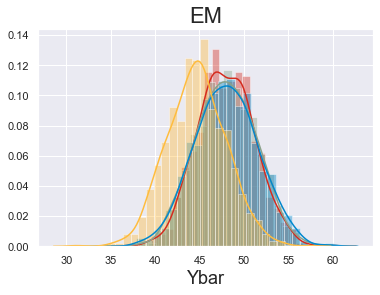

In [43]:
sns.distplot(FULL_xbar, color = '#D52B1EFF', label = 'full')
sns.distplot(MCAR_xbar, color = '#8AA28AFF', label = 'mcar')
sns.distplot(MAR_xbar, color = '#0088CEFF', label = 'mar')
sns.distplot(MNAR_xbar, color = '#FFBC3DFF', label = 'mnar')
#plt.legend(loc='center right')
plt.title("EM", fontsize = 22)
plt.xlabel('Ybar', fontsize=18)

#colors = ["#FFBC3DFF", "#0088CEFF", "#D52B1EFF", "#8AA28AFF"] # yellow, blue, red, green
print("FULL: %.4f, %.4f" %(np.mean(FULL_xbar), np.var(FULL_xbar)))
print("MCAR: %.4f, %.4f" %(np.mean(MCAR_xbar), np.var(MCAR_xbar)))
print("MAR: %.4f, %.4f" %(np.mean(MAR_xbar), np.var(MAR_xbar)))
print("MNAR: %.4f, %.4f" %(np.mean(MNAR_xbar), np.var(MNAR_xbar)))

# For Slides

In [31]:
df = pd.read_csv("DF")
df['income'] = round(df['income'], 1)
x = df[['income', 'education']]

Text(0.5, 0, 'Income - Sample Mean')

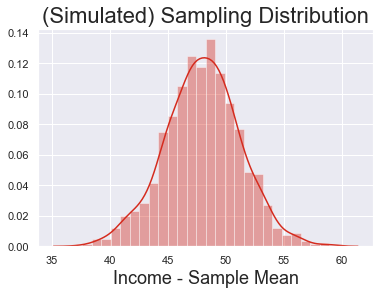

In [35]:
sns.distplot(FULL_xbar, color = '#D52B1EFF', label = 'full')
plt.title("(Simulated) Sampling Distribution", fontsize = 22)
plt.xlabel('Income - Sample Mean', fontsize=18)

Text(0.5, 0, 'Income - Sample Mean')

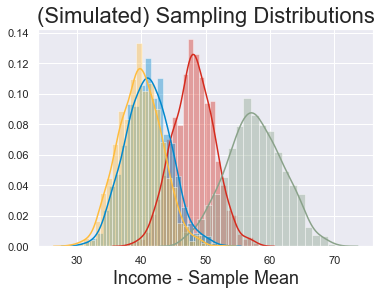

In [51]:
sns.distplot(FULL_xbar, color = '#D52B1EFF', label = 'full')
MCAR_xbar = [i * 1.2 for i in MCAR_xbar]
sns.distplot(MCAR_xbar, color = '#8AA28AFF', label = 'mcar')
sns.distplot(MAR_xbar, color = '#0088CEFF', label = 'mar')
sns.distplot(MNAR_xbar, color = '#FFBC3DFF', label = 'mnar')
plt.title("(Simulated) Sampling Distributions", fontsize = 22)
plt.xlabel('Income - Sample Mean', fontsize=18)

In [52]:
20 ** 2 / 40

10.0

In [123]:
x = [71.2, 30.2, 33.1]
y = [20, 13, 14]
t = pd.DataFrame(list(zip(x, y)), 
               columns =['income', 'education']) 
mod, X, Y = runRegression(t)
print(mod.coef_)
print(mod.intercept_)

[[6.02906977]]
[-49.62209302]


In [55]:
x = [71.2, 30.2, 33.1, 60.1, 41.8, 51.6]
#x = [49.1, 45.6, 47.9, 51.2, 47.1]
y = [20, 13, 14, 18, 16, 15]
np.var(x,ddof = 0)

212.48333333333338

In [133]:
np.matrix([[np.var(t['income'], ddof=1),0], [0,np.var(t['education'], ddof=1)]])

matrix([[523.50333333,   0.        ],
        [  0.        ,  14.33333333]])

In [57]:
np.cov(x,y, ddof=0)

array([[212.48333333,  32.76666667],
       [ 32.76666667,   5.66666667]])

FULL: 48.0936, 9.7112
MCAR: 48.1371, 12.7924
MAR: 40.9816, 11.4900
MNAR: 39.7964, 10.9749


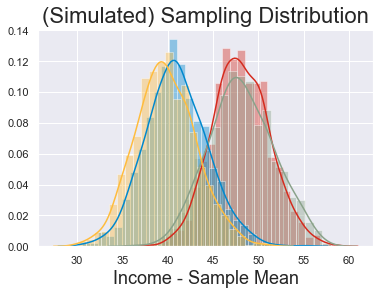

In [66]:
sns.distplot(FULL_xbar, color = '#D52B1EFF', label = 'full')
sns.distplot(MCAR_xbar, color = '#8AA28AFF', label = 'mcar')
sns.distplot(MAR_xbar, color = '#0088CEFF', label = 'mar')
sns.distplot(MNAR_xbar, color = '#FFBC3DFF', label = 'mnar')
#plt.legend(loc='center right')
plt.title("(Simulated) Sampling Distribution", fontsize = 22)
plt.xlabel('Income - Sample Mean', fontsize=18)

#colors = ["#FFBC3DFF", "#0088CEFF", "#D52B1EFF", "#8AA28AFF"] # yellow, blue, red, green
print("FULL: %.4f, %.4f" %(np.mean(FULL_xbar), np.var(FULL_xbar)))
print("MCAR: %.4f, %.4f" %(np.mean(MCAR_xbar), np.var(MCAR_xbar)))
print("MAR: %.4f, %.4f" %(np.mean(MAR_xbar), np.var(MAR_xbar)))
print("MNAR: %.4f, %.4f" %(np.mean(MNAR_xbar), np.var(MNAR_xbar)))